In [1]:
%pylab qt
from sharad import *
from geopandas import GeoDataFrame
from ipypb import track

from segyconv import *

Populating the interactive namespace from numpy and matplotlib


In [9]:
regions = "/data/SciBigData/radargrams/regions.gpkg"
layer = "regions"

regs = GeoDataFrame.from_file(regions, layer=layer, crs=fiona.crs.from_string("+proj=stere +lat_0=90 +lat_ts=90 +lon_0=0 +k=1 +x_0=0 +y_0=0 +a=3376200 +b=3376200 +units=m +no_defs"))
regs.crs



{'proj': 'stere',
 'lat_0': 90,
 'lat_ts': 90,
 'lon_0': 0,
 'k': 1,
 'x_0': 0,
 'y_0': 0,
 'a': 3376200,
 'b': 3376200,
 'units': 'm',
 'no_defs': True}

In [5]:
def file_to_tiff(filename):
    return filename[0:-9] + "_tiff.tif"



In [15]:
folder = "/home/luca/Documenti-local/notebooks.git/sharad/newdataset/"    
files = find_sharad_radargrams_in_folder(folder)
print (files)
close("all")

ts = []
for f in track(files):
    print(f"working on {f}")
    
    tab = lbl_to_geom(f)
    
    i = match_sharad_id(tab)
    t = read_geom_lbl(tab)
    t = pandas_to_geopandas_points(t)
    t = t.to_crs(regs.crs)
    lname = match_sharad_id(f)
    ts.append(t)
    t = t[t.within(regs.geometry.values[0])]
    if t.empty:
        print("skipping...")
        continue
    mx = np.max(t.radargram_column)
    mi = np.min(t.radargram_column)
    
   
    
    id_min = t.radargram_column == mi
    x_min, y_min = t[id_min].geometry.values[0].xy
    x_min, y_min = x_min[0], y_min[0]
    
    id_max = t.radargram_column == mx
    x_max, y_max = t[id_max].geometry.values[0].xy
    x_max, y_max = x_max[0], y_max[0]
    
    print(f"f: {i}: min {mi} - {(x_min, y_min)}, max {mx}- {(x_max, y_max)}, range {mx-mi}")
    
    # segy creation
    
    tiffname = f[0:-8] + "tiff.tif"
    segyname = f[0:-8] + "segy.sgy"
    # assembly the section 
    image = plt.imread(tiffname)
    newimage = crop_section(image, mi, mx)
    out=assemply_segy(newimage, x_min, x_max, y_min, y_max)
    save_segy(out, segyname)
    
    t.plot(ax=gca(), markersize=0.1)

regs.plot(ax=gca(), edgecolor="b", alpha=0.2)

['/home/luca/Documenti-local/notebooks.git/sharad/newdataset/s_03347901_geom.lbl', '/home/luca/Documenti-local/notebooks.git/sharad/newdataset/s_00699002_geom.lbl', '/home/luca/Documenti-local/notebooks.git/sharad/newdataset/s_00478802_geom.lbl', '/home/luca/Documenti-local/notebooks.git/sharad/newdataset/s_03746301_geom.lbl', '/home/luca/Documenti-local/notebooks.git/sharad/newdataset/s_01406501_geom.lbl', '/home/luca/Documenti-local/notebooks.git/sharad/newdataset/s_04434701_geom.lbl', '/home/luca/Documenti-local/notebooks.git/sharad/newdataset/s_00622002_geom.lbl', '/home/luca/Documenti-local/notebooks.git/sharad/newdataset/s_00739902_geom.lbl', '/home/luca/Documenti-local/notebooks.git/sharad/newdataset/s_03785502_geom.lbl', '/home/luca/Documenti-local/notebooks.git/sharad/newdataset/s_03780402_geom.lbl', '/home/luca/Documenti-local/notebooks.git/sharad/newdataset/s_02563501_geom.lbl', '/home/luca/Documenti-local/notebooks.git/sharad/newdataset/s_03878201_geom.lbl', '/home/luca/Doc

 [████████████████████████████████████████████████████████████] 22/22 [00:04<00:00, 0.20s/it]

working on /home/luca/Documenti-local/notebooks.git/sharad/newdataset/s_03347901_geom.lbl
f: 03347901: min 1806 - (233400.99656280407, -155397.34693932047), max 1940- (171553.91385764506, -157215.07229827408), range 134
working on /home/luca/Documenti-local/notebooks.git/sharad/newdataset/s_00699002_geom.lbl
skipping...
working on /home/luca/Documenti-local/notebooks.git/sharad/newdataset/s_00478802_geom.lbl
skipping...
working on /home/luca/Documenti-local/notebooks.git/sharad/newdataset/s_03746301_geom.lbl
skipping...
working on /home/luca/Documenti-local/notebooks.git/sharad/newdataset/s_01406501_geom.lbl
f: 01406501: min 2922 - (189655.64540064862, -121263.72895845248), max 3007- (199242.53747973946, -159266.84564682184), range 85
working on /home/luca/Documenti-local/notebooks.git/sharad/newdataset/s_04434701_geom.lbl
skipping...
working on /home/luca/Documenti-local/notebooks.git/sharad/newdataset/s_00622002_geom.lbl
f: 00622002: min 82 - (171352.21137214714, -130451.7695740451),

In [14]:
t.empty

True

In [129]:
type(ma)

module

In [106]:
regs.bounds

,minx,miny,maxx,maxy
0,171313.966783,-159625.117545,233507.550704,-120836.307277


In [72]:
t = ts[0]
p = t[t.radargram_column== 82]

In [11]:
import pyproj 
pyproj.Proj({"init": "epsg:104971"})

RuntimeError: b'no arguments in initialization list'

In [53]:
p.within(regs)

0     False
81    False
dtype: bool

In [58]:
regs.plot(alpha=.1)
p.plot(ax=gca())

regs.contains(p)

0     False
81    False
dtype: bool

In [73]:
pp = p.geometry.to_numpy()[0]
rr = regs.geometry.to_numpy()[0]

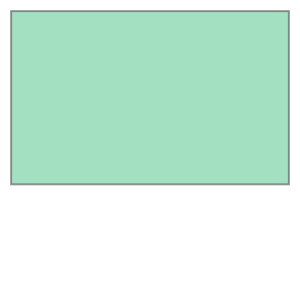

In [87]:
regs.geometry.values[0]

In [82]:
np.sum(t.within(regs[0]))


KeyError: 0

In [40]:
from shapely.geometry import Point, Polygon
import geopandas

polys = geopandas.GeoSeries({
    'foo': Polygon([(5, 5), (5, 13), (13, 13), (13, 5)]),
    'bar': Polygon([(10, 10), (10, 15), (15, 15), (15, 10)]),
})




_pnts = [Point(3, 3), Point(8, 8), Point(11, 11)]
pnts = geopandas.GeoDataFrame(geometry=_pnts, index=['A', 'B', 'C'])
pnts.crs = regs.crs


pnts = pnts.assign(**{key: pnts.within(geom) for key, geom in polys.items()})

print(pnts)

AttributeError: 'Polygon' object has no attribute 'crs'

In [42]:
polys["foo"].crs

AttributeError: 'Polygon' object has no attribute 'crs'

In [44]:
ts[0]

,radargram_column,time,latitude,longitude,mars_radius,spacecraft_radius,radial_velocity,tangential_velocity,sza,phase_1.0e16,geometry
0,1,2007-09-14T05:32:52.201,86.5484,60.9054,3378.280,3694.267,1.7420,3396.1279,108.38,0.0,POINT (177778.1472531696 -98928.10265701113)
1,2,2007-09-14T05:32:52.338,86.5434,60.8229,3378.280,3694.267,1.7453,3396.1266,108.39,0.0,POINT (177892.9962515962 -99327.74756761825)
2,3,2007-09-14T05:32:52.498,86.5376,60.7266,3378.280,3694.267,1.7491,3396.1250,108.39,0.0,POINT (178024.1960796372 -99793.87125315874)
3,4,2007-09-14T05:32:52.635,86.5326,60.6440,3378.281,3694.266,1.7524,3396.1237,108.40,0.0,POINT (178137.1749019933 -100194.9840838258)
4,5,2007-09-14T05:32:52.795,86.5268,60.5478,3378.281,3694.266,1.7563,3396.1222,108.41,0.0,POINT (178266.5704264583 -100662.1376672929)
5,6,2007-09-14T05:32:52.932,86.5218,60.4652,3378.281,3694.266,1.7596,3396.1209,108.41,0.0,POINT (178377.8463318532 -101064.4012402831)
6,7,2007-09-14T05:32:53.092,86.5160,60.3690,3378.281,3694.266,1.7634,3396.1193,108.42,0.0,POINT (178505.2571139045 -101532.8873957402)
7,8,2007-09-14T05:32:53.229,86.5110,60.2864,3378.281,3694.265,1.7667,3396.1180,108.42,0.0,POINT (178614.8240268176 -101936.2949882457)
8,9,2007-09-14T05:32:53.389,86.5052,60.1901,3378.282,3694.265,1.7705,3396.1165,108.43,0.0,POINT (178740.0642843321 -102406.4178373878)
9,10,2007-09-14T05:32:53.526,86.5002,60.1076,3378.282,3694.265,1.7738,3396.1152,108.44,0.0,POINT (178848.0948872521 -102810.6507395016)


In [32]:
regs.to_json()

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {}, "geometry": {"type": "Polygon", "coordinates": [[[171313.96678292737, -159625.1175452163], [171313.96678292737, -120836.3072770222], [233507.55070447247, -120836.3072770222], [233507.55070447247, -159625.1175452163], [171313.96678292737, -159625.1175452163]]]}}]}'

In [34]:
t.geometry.to_json()

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {}, "geometry": {"type": "Point", "coordinates": [1823081.0914928657, 130088.41945332398]}, "bbox": [1823081.0914928657, 130088.41945332398, 1823081.0914928657, 130088.41945332398]}, {"id": "1", "type": "Feature", "properties": {}, "geometry": {"type": "Point", "coordinates": [1823006.300625289, 130070.29086883199]}, "bbox": [1823006.300625289, 130070.29086883199, 1823006.300625289, 130070.29086883199]}, {"id": "2", "type": "Feature", "properties": {}, "geometry": {"type": "Point", "coordinates": [1822481.4111035268, 129962.50603922893]}, "bbox": [1822481.4111035268, 129962.50603922893, 1822481.4111035268, 129962.50603922893]}, {"id": "3", "type": "Feature", "properties": {}, "geometry": {"type": "Point", "coordinates": [1822031.5504622627, 129869.69817784667]}, "bbox": [1822031.5504622627, 129869.69817784667, 1822031.5504622627, 129869.69817784667]}, {"id": "4", "type": "Feature", "properties": {}